In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/sample_data/Zoo.csv')

In [4]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns = 'animal name', inplace = True)

In [9]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# Model building

In [10]:
x = df.iloc[:,:-1]
y = df['type']

--------
* splitting into features & target

In [11]:
x = df.drop('type', axis = 1)
y = df['type']

In [12]:
# standardizing the features
sc = StandardScaler()

x = sc.fit_transform(x)

In [13]:
x

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [14]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [15]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
ypred = knn.predict(x_test)
knn.score(x_train,y_train), knn.score(x_test,y_test)

(0.975, 0.9523809523809523)

-----------------------
# Hyperparameter Tuning for KNN

In [16]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_acc.append(knn.score(x_train,y_train))
    test_acc.append(knn.score(x_test,y_test))

In [17]:
train_acc

[1.0,
 0.9625,
 0.975,
 0.95,
 0.975,
 0.9,
 0.8875,
 0.875,
 0.875,
 0.9,
 0.875,
 0.875,
 0.875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.9125,
 0.9125]

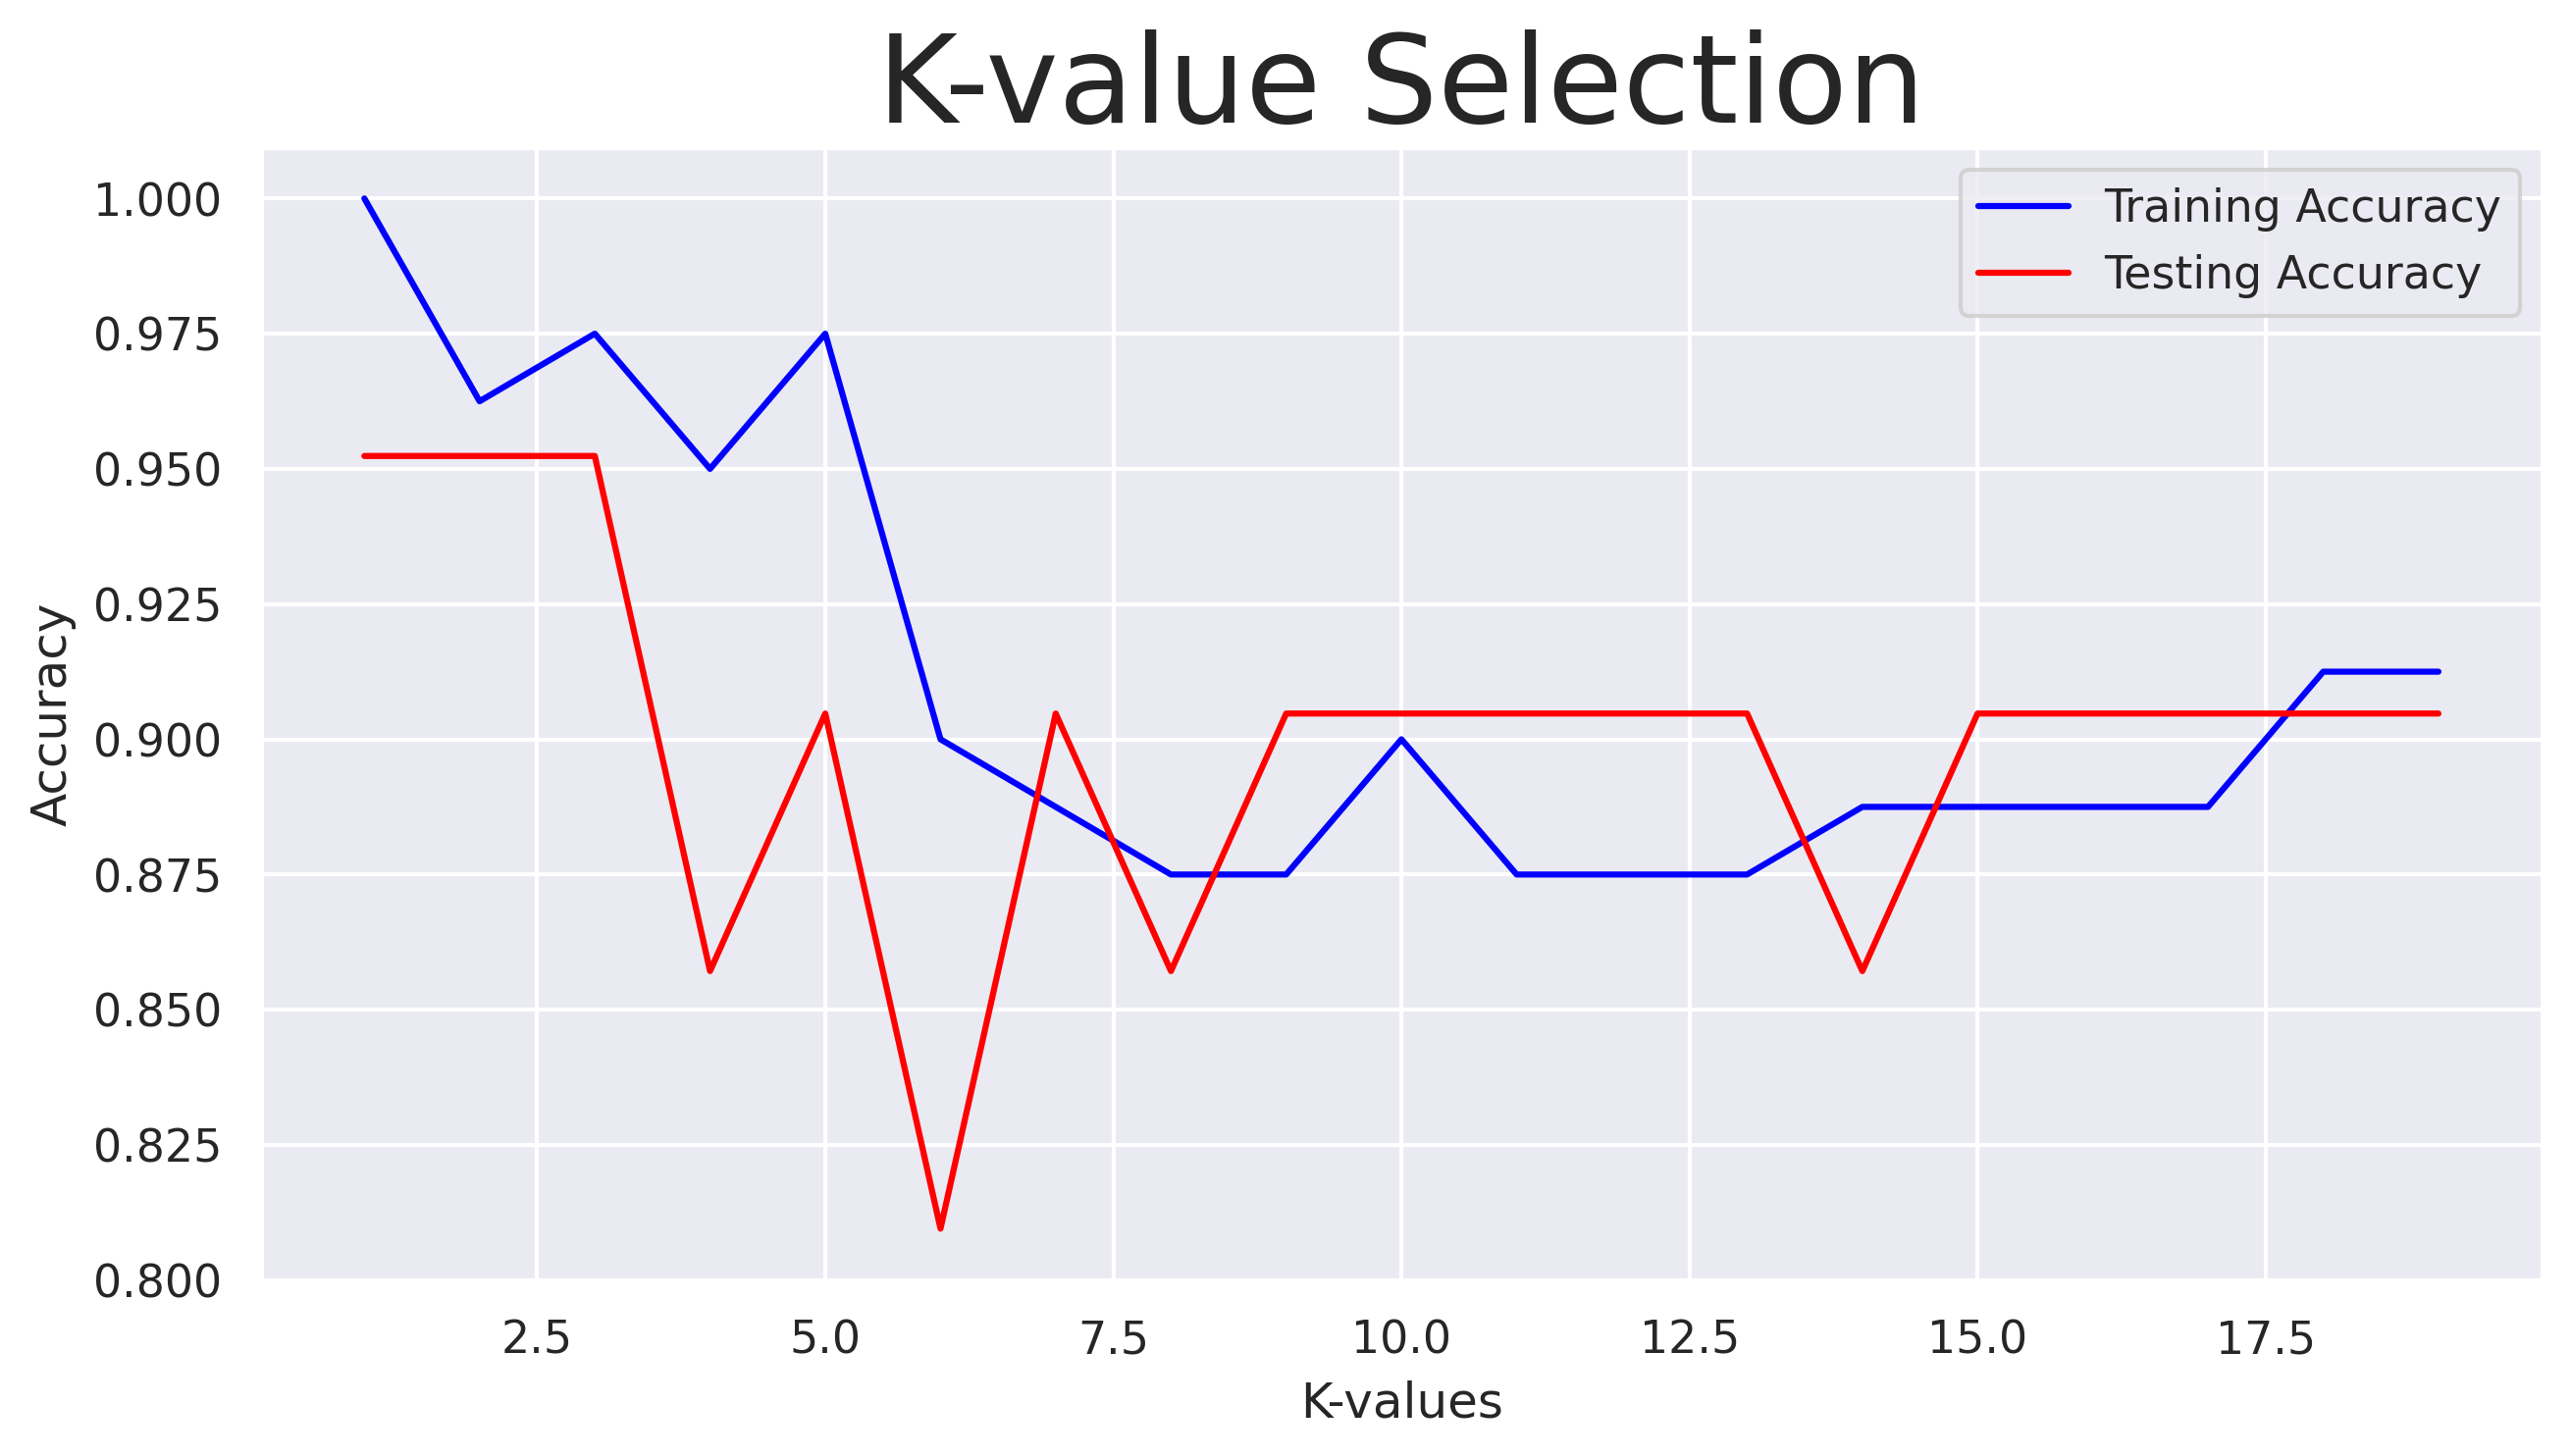

In [18]:
plt.plot(range(1,20), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,20), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection',size = 30)
plt.legend()

In [19]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
ypred = knn.predict(x_test)
print(f"Train: {knn.score(x_train,y_train)}\nTest: {knn.score(x_test,y_test)}")

Train: 0.9625
Test: 0.9523809523809523


In [20]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           0.95        21
   macro avg       0.84      0.86      0.85        21
weighted avg       0.91      0.95      0.93        21



In [21]:
print(f' Training accuracy : {knn.score(x_train,y_train)}')
print(f' Testing accuracy : {knn.score(x_test,y_test)}')

 Training accuracy : 0.9625
 Testing accuracy : 0.9523809523809523


------------------
* Finding best parameters using GriDsearchCV

In [22]:
param = {'n_neighbors': range(1,20),
         'metric': ['minkowski','euclidean']}

In [23]:
grid_model = GridSearchCV(estimator=knn,param_grid=param, cv = 10)

#training the gridserch model on train data

grid_model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=2),
             param_grid={'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': range(1, 20)})

In [24]:

# checking for best performing estimators

print(grid_model.best_estimator_)

# checking for best performing parameters

print(grid_model.best_params_)

KNeighborsClassifier(n_neighbors=1)
{'metric': 'minkowski', 'n_neighbors': 1}


In [25]:
grid_model.best_score_

0.95

In [26]:
# predicting using best performing parameters

pred = grid_model.predict(x_test)

In [27]:
pred

array([2, 1, 1, 2, 2, 4, 2, 7, 4, 1, 1, 2, 2, 2, 1, 1, 7, 7, 5, 6, 2])

In [28]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           0.95        21
   macro avg       0.84      0.86      0.85        21
weighted avg       0.91      0.95      0.93        21



In [29]:
print(f' Training accuracy : {grid_model.score(x_train,y_train)}')
print(f' Testing accuracy : {grid_model.score(x_test,y_test)}')

 Training accuracy : 1.0
 Testing accuracy : 0.9523809523809523
